In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.callbacks import EarlyStopping

# Datensatz:  PO_MSD

## Datenvisualisierung:

In [50]:
#  PO_MSD Datei einlesen:
PO_MSD = pd.read_csv("retail_dataset_PO_MSD_o2 .csv")
PO_MSD

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Neujahr
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-07,PO,CR_LI_HOL/Zalisz K,MSD,890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-15,PO,CR_LI_HOL/Zalisz K,MSD,1140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-19,PO,CR_LI_HOL/Zalisz K,MSD,1283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2023-01-30,PO,CR_LI_HOL/Zalisz K,MSD,1015.0,2023-01-30,2023-02-03,1.0,-,198.0,12.0,NaN,NaN
418,2022-03-21,PO,CR_LI_HOL/Zalisz K,MSD,1008.0,2022-03-21,2022-03-27,1.0,Einschränkung,185.0,12.0,NaN,NaN
419,2022-02-01,PO,CR_LI_HOL/Zalisz K,MSD,1816.0,2022-02-01,2022-02-05,1.0,Einschränkung,175.0,13.0,NaN,NaN
420,2023-04-05,PO,CR_LI_HOL/Zalisz K,MSD,685.0,2023-04-05,2023-04-17,1.0,Einschränkung,294.0,13.0,NaN,NaN


In [51]:
PO_MSD.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday'],
      dtype='object')

In [52]:
PO_MSD = PO_MSD.sort_values(by='date')
PO_MSD

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Neujahr
249,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1.0,Einschränkung,2.0,1.0,NaN,NaN
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1.0,Einschränkung,1.0,1.0,NaN,NaN
327,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1.0,Ausfall,14.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2023-05-03,PO,CR_LI_HOL/Zalisz K,MSD,690.0,2023-05-03,2023-05-04,1.0,-,29.0,2.0,NaN,NaN
309,2023-05-04,PO,CR_LI_HOL/Zalisz K,MSD,807.0,2023-05-04,2023-05-04,1.0,Einschränkung,10.0,1.0,NaN,NaN
360,2023-05-05,PO,CR_LI_HOL/Zalisz K,MSD,948.0,2023-05-05,2023-05-07,1.0,-,63.0,3.0,NaN,NaN
383,2023-05-06,PO,CR_LI_HOL/Zalisz K,MSD,1075.0,2023-05-06,2023-05-08,1.0,Einschränkung,49.0,3.0,NaN,NaN


In [53]:
PO_MSD["is_incident"].describe()

count    286.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: is_incident, dtype: float64

In [54]:
sum_sales_is_incident = PO_MSD.loc[PO_MSD['is_incident'] == 1, 'sales'].sum()

print(sum_sales_is_incident)

251737.0


In [55]:
# Anzahl die ["incident_hours"]:
sales_sum = PO_MSD["sales"].sum()

print(sales_sum)

386233.0


Text(0, 0.5, 'Sales')

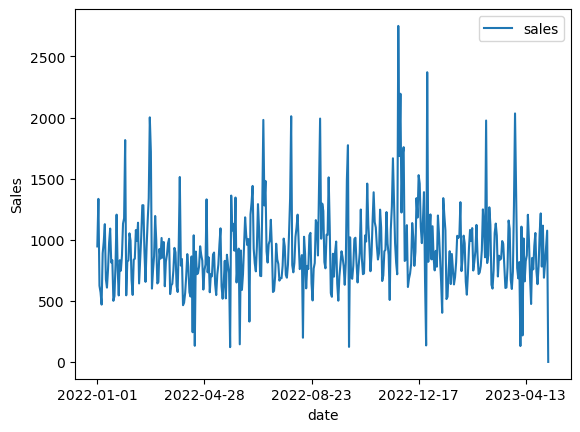

In [56]:
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
PO_MSD.plot(x = 'date', y = 'sales', ax = ax) 
plt.ylabel('Sales')

In [57]:
frq=PO_MSD["is_incident"].value_counts(dropna=False)
frq

is_incident
1.0    286
NaN    136
Name: count, dtype: int64

In [58]:
# Replace NaN values with 0
PO_MSD["is_incident"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_MSD["is_incident"] = PO_MSD["is_incident"].astype(int)

# Now you can check the value counts again
frq = PO_MSD["is_incident"].value_counts(dropna=False)
print(frq)

is_incident
1    286
0    136
Name: count, dtype: int64


In [59]:
#Change to datetime:
PO_MSD["date"]= pd.to_datetime(PO_MSD["date"])

# Konvertieren Sie die Spalte "date" in das gewünschte Monat-Jahr-Format und speichern Sie sie in einer neuen Spalte "Monat"
PO_MSD['Monat'] = pd.to_datetime(PO_MSD['date']).dt.to_period('M')

PO_MSD.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,NaN,1.0,Neujahr,2022-01
249,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,1.0,NaN,NaN,2022-01
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,2022-01
250,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,1.0,NaN,NaN,2022-01
327,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,2.0,NaN,NaN,2022-01


In [60]:
# Replace NaN values with 0
PO_MSD["is_holiday"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_MSD["is_holiday"] = PO_MSD["is_holiday"].astype(int)

# Now you can check the value counts again
frq = PO_MSD["is_holiday"].value_counts(dropna=False)
print(frq)

is_holiday
0    412
1     10
Name: count, dtype: int64


In [61]:
PO_MSD.describe()

,date,sales,is_incident,incident_hours,incident_days,is_holiday
count,422,422.000000,422.000000,212.000000,212.000000,422.000000
mean,2022-09-04 00:00:00,915.244076,0.677725,26.108491,2.481132,0.023697
min,2022-01-01 00:00:00,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,2022-05-04 06:00:00,719.000000,0.000000,2.000000,1.000000,0.000000
50%,2022-09-04 00:00:00,871.000000,1.000000,5.000000,2.000000,0.000000
75%,2023-01-04 18:00:00,1056.750000,1.000000,28.000000,3.000000,0.000000
max,2023-05-08 00:00:00,2750.000000,1.000000,363.000000,18.000000,1.000000
std,NaN,330.973048,0.467902,49.652752,2.498269,0.152283


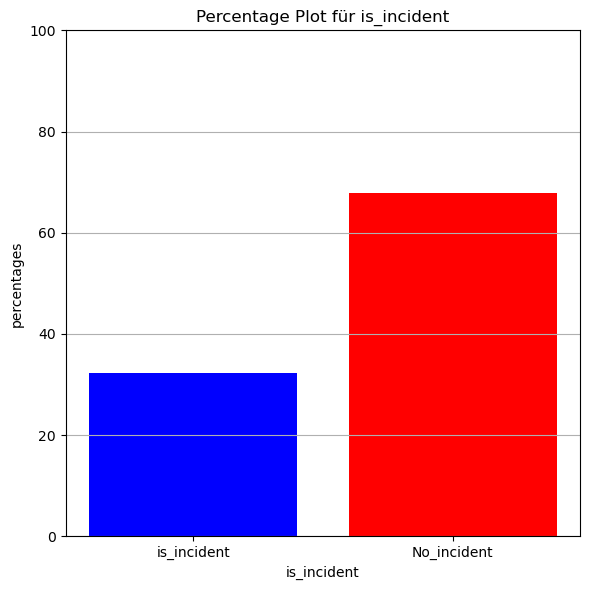

In [62]:
# Zählen Sie die Anzahl der 0 und 1 in der 'binary_var'-Spalte
is_incident_counts = PO_MSD['is_incident'].value_counts()

# Berechnen Sie die Prozentsätze
total_samples = len(PO_MSD)
percentages = is_incident_counts / total_samples * 100
colors = ['red', 'blue']
# Erstellen Sie den Plot
plt.figure(figsize=(6, 6))
plt.bar(percentages.index, percentages.values, color = colors)
plt.xlabel('is_incident')
plt.ylabel('percentages')
plt.title('Percentage Plot für is_incident')
plt.xticks(percentages.index, labels=['No_incident', 'is_incident'])
plt.ylim(0, 100)  # Stellen Sie die y-Achse auf 0 bis 100 ein
plt.grid(axis='y')
plt.tight_layout()
plt.show()

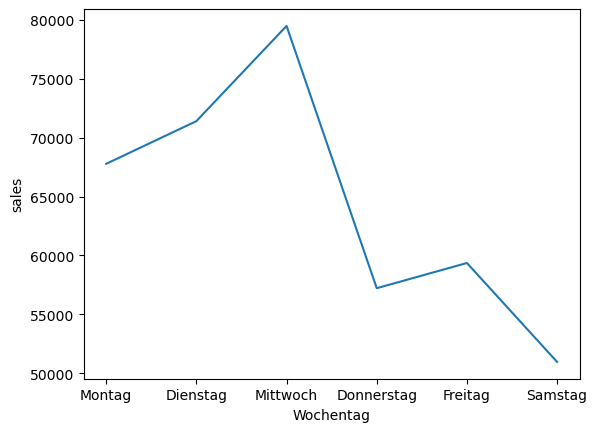

In [63]:
# Extrahiere die Wochentage für jede Zeile in der "Datum"-Spalte
PO_MSD['Wochentag'] = PO_MSD['date'].dt.day_name()

# Gruppieren Sie die Daten nach 'Wochentag' und berechnen Sie die Summe der Verkäufe für jeden Wochentag
Wochentag_group = PO_MSD.groupby('Wochentag')
sales = Wochentag_group['sales'].sum()
Wochentags = [Wochentag for Wochentag, _ in Wochentag_group]


# Plot der Daten
plt.plot(Wochentags, sales)
plt.ylabel('sales')
plt.xlabel('Wochentag')
#plt.xticks(rotation='vertical', size=8)

# Hinzufügen der Wochentagsnamen als X-Achsenbeschriftungen
wochentag_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag']
plt.xticks(Wochentags, wochentag_names)

plt.show()

In [64]:
frq=PO_MSD["Wochentag"].value_counts(dropna=False)
frq

Wochentag
Saturday     71
Monday       71
Tuesday      70
Wednesday    70
Thursday     70
Friday       70
Name: count, dtype: int64

In [65]:
#Change to datetime:
PO_MSD["date"]= pd.to_datetime(PO_MSD["date"])
# Konvertieren Sie die Spalte "date" in das gewünschte Monat-Jahr-Format und speichern Sie sie in einer neuen Spalte "Monat"
PO_MSD['Monat'] = pd.to_datetime(PO_MSD['date']).dt.to_period('M')
PO_MSD

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,NaN,1,Neujahr,2022-01,Saturday
249,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,1.0,0,NaN,2022-01,Monday
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,2022-01,Tuesday
250,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,1.0,0,NaN,2022-01,Wednesday
327,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,2.0,0,NaN,2022-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2023-05-03,PO,CR_LI_HOL/Zalisz K,MSD,690.0,2023-05-03,2023-05-04,1,-,29.0,2.0,0,NaN,2023-05,Wednesday
309,2023-05-04,PO,CR_LI_HOL/Zalisz K,MSD,807.0,2023-05-04,2023-05-04,1,Einschränkung,10.0,1.0,0,NaN,2023-05,Thursday
360,2023-05-05,PO,CR_LI_HOL/Zalisz K,MSD,948.0,2023-05-05,2023-05-07,1,-,63.0,3.0,0,NaN,2023-05,Friday
383,2023-05-06,PO,CR_LI_HOL/Zalisz K,MSD,1075.0,2023-05-06,2023-05-08,1,Einschränkung,49.0,3.0,0,NaN,2023-05,Saturday


In [66]:
PO_MSD['Monat'] = PO_MSD['Monat'].dt.to_timestamp()
PO_MSD['Monat'] = pd.to_datetime(PO_MSD['Monat'])
PO_MSD['month_name'] = PO_MSD['Monat'].dt.strftime('%B')

# Convert the "Monat" to datetime data type if it's not already
PO_MSD['Monat'] = pd.to_datetime(PO_MSD['Monat'])

# Use dt.month to extract the month number and categorize based on month number (1 to 12)
PO_MSD['Month_k'] = PO_MSD['Monat'].dt.month

# Print the DataFrame with the new "Month_k" column
PO_MSD.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag,month_name,Month_k
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,NaN,1,Neujahr,2022-01-01,Saturday,January,1
249,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,1.0,0,NaN,2022-01-01,Monday,January,1
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,2022-01-01,Tuesday,January,1
250,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,1.0,0,NaN,2022-01-01,Wednesday,January,1
327,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,2.0,0,NaN,2022-01-01,Thursday,January,1


In [67]:
frq= PO_MSD['Month_k'].value_counts(dropna=False)
frq

Month_k
3     54
1     52
4     51
2     48
5     33
8     27
12    27
6     26
7     26
9     26
10    26
11    26
Name: count, dtype: int64

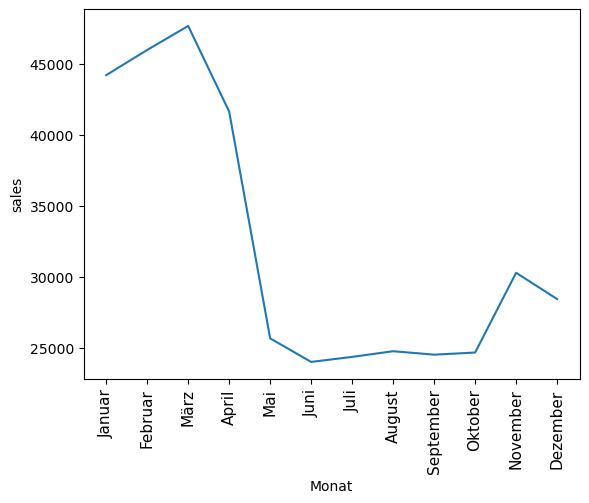

In [68]:
def get_month_name(month_num):
    months = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
    return months[month_num - 1]  # Monatsnummern sind 1-basiert, daher müssen wir 1 abziehen

Monat_group = PO_MSD.groupby('Month_k')
sales = Monat_group['sales'].sum()
Monats = [get_month_name(month_num) for month_num in sales.index]

plt.plot(Monats, sales)
plt.ylabel('sales')
plt.xlabel('Monat')
plt.xticks(rotation='vertical', size=11)
plt.show()

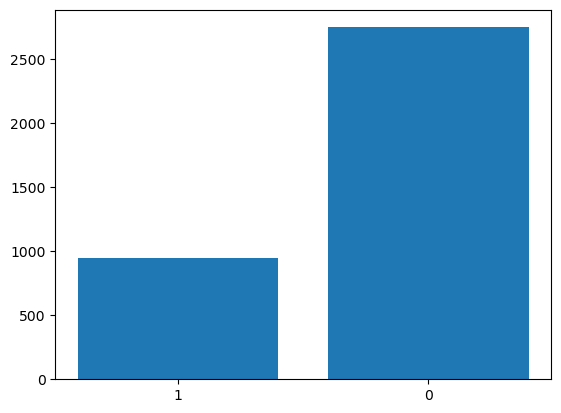

In [69]:
PO_MSD['is_holiday'] = PO_MSD['is_holiday'].astype(str)

plt.bar(PO_MSD['is_holiday'],PO_MSD['sales'])
plt.show()

In [70]:
PO_MSD.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday', 'Monat', 'Wochentag', 'month_name', 'Month_k'],
      dtype='object')

In [71]:
# Erstellen Sie die Dummy-Variablen für "is_holiday"
holiday_dummies = pd.get_dummies(PO_MSD['is_holiday'], prefix='Holiday', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "is_incident"
incident_dummies = pd.get_dummies(PO_MSD['is_incident'], prefix='Incident', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Wochentag"
weekday_dummies = pd.get_dummies(PO_MSD['Wochentag'], prefix='Weekdays', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Month_k"
month_dummies = pd.get_dummies(PO_MSD['Month_k'], prefix='Month', drop_first=True)

# Fügen Sie die Dummy-Variablen dem DataFrame hinzu
PO_MSD = pd.concat([PO_MSD, holiday_dummies, incident_dummies, weekday_dummies, month_dummies], axis=1)

PO_MSD.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
249,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
250,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,...,False,False,False,False,False,False,False,False,False,False
327,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,...,False,False,False,False,False,False,False,False,False,False


In [72]:
frq=PO_MSD["Incident_1"].value_counts(dropna=False)
frq

Incident_1
True     286
False    136
Name: count, dtype: int64

In [73]:
frq=PO_MSD["Wochentag"].value_counts(dropna=False)
frq

Wochentag
Saturday     71
Monday       71
Tuesday      70
Wednesday    70
Thursday     70
Friday       70
Name: count, dtype: int64

In [74]:
PO_MSD.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday', 'Monat', 'Wochentag', 'month_name', 'Month_k', 'Holiday_1',
       'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday',
       'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [75]:
# Daten PO_Port speichern:
PO_MSD.to_csv("PO_MSD.csv", index = None)

In [76]:
# Daten PO_Port einlesen:
PO_MSD=pd.read_csv("PO_MSD.csv")
PO_MSD.head(30)

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,...,False,False,False,False,False,False,False,False,False,False
2,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,...,False,False,False,False,False,False,False,False,False,False
4,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,...,False,False,False,False,False,False,False,False,False,False
5,2022-01-07,PO,CR_LI_HOL/Zalisz K,MSD,890.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
6,2022-01-08,PO,CR_LI_HOL/Zalisz K,MSD,984.0,2022-01-08,2022-01-08,1,Ausfall,3.0,...,False,False,False,False,False,False,False,False,False,False
7,2022-01-10,PO,CR_LI_HOL/Zalisz K,MSD,1128.0,2022-01-10,2022-01-15,1,-,120.0,...,False,False,False,False,False,False,False,False,False,False
8,2022-01-11,PO,CR_LI_HOL/Zalisz K,MSD,677.0,2022-01-11,2022-01-15,1,Ausfall,8.0,...,False,False,False,False,False,False,False,False,False,False
9,2022-01-12,PO,CR_LI_HOL/Zalisz K,MSD,609.0,2022-01-12,2022-01-15,1,Ausfall,29.0,...,False,False,False,False,False,False,False,False,False,False


# Regression: 

In [77]:
# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y)
X = PO_MSD[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]].astype(int)  
y = PO_MSD['sales']
PO_MSD['sales'] = pd.to_numeric(PO_MSD['sales'])

# Füge eine Konstante hinzu, um den Intercept zu berücksichtigen
X = sm.add_constant(X)

# Erstelle und fitte das Regressionsmodell
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     11.78
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.75e-27
Time:                        21:05:31   Log-Likelihood:                -2957.6
No. Observations:                 422   AIC:                             5953.
Df Residuals:                     403   BIC:                             6030.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                970.2206     55

In [38]:
# Make forecasts using the model
forecasts = model.predict(X)

# Add the forecasts as a new column to the original DataFrame 'PO_TSI'
PO_MSD['sales_forecast_Regression'] = forecasts
PO_MSD.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,368.578584
1,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,...,False,False,False,False,False,False,False,False,False,980.706959
2,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,830.367780
3,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,...,False,False,False,False,False,False,False,False,False,638.533860
4,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,...,False,False,False,False,False,False,False,False,False,743.399581


<Axes: >

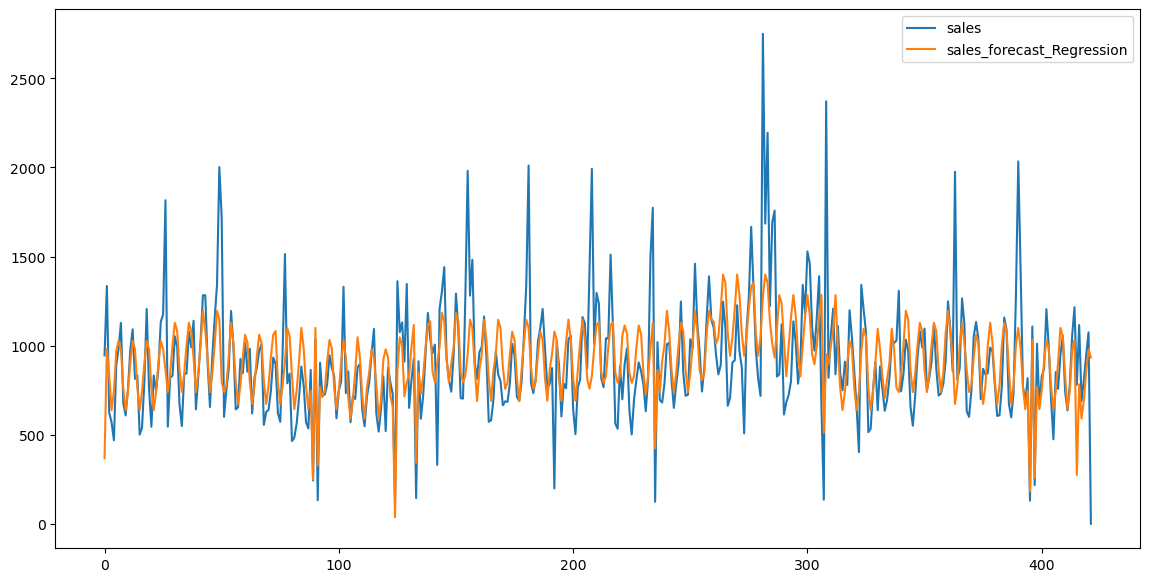

In [111]:
PO_MSD[["sales", "sales_forecast_Regression"]].plot(figsize=(14, 7))

# ARIMAX:

In [112]:
exog= PO_MSD[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
endog= PO_MSD['sales']

# Create the ARIMA model with AR order = 1 and MA order = 0 and provide exogenous variables
order = (1, 0, 0)  # AR order = 1, MA order = 0
model = sm.tsa.ARIMA(endog, exog, order=order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  422
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2944.552
Date:                Tue, 01 Aug 2023   AIC                           5931.105
Time:                        23:24:32   BIC                           6016.050
Sample:                             0   HQIC                          5964.673
                                - 422                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                948.0157     74.472     12.730      0.000     802.053    1093.978
Holiday_1           -761.9038     81.834     -9.310      0.000    -922.295    -601.513
Incident_1          

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Prognose:

In [113]:
# Define the exogenous features for forecasting
exogenous_features= PO_MSD[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  

# Generate the forecast for the entire data period
forecast = results.predict(exog=exogenous_features)

# Add the forecasted values to the DataFrame
PO_MSD["Forecast_ARIMAX"] = forecast

# Print the DataFrame with the forecasted values
PO_MSD.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag,month_name,Month_k,Holiday_1,Incident_1,Weekdays_Monday,Weekdays_Saturday,Weekdays_Thursday,Weekdays_Tuesday,Weekdays_Wednesday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression,Forecast_ARIMAX
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,NaN,1,Neujahr,2022-01-01,Saturday,January,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368.578584,321.031524
1,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2.0,1.0,0,NaN,2022-01-01,Monday,January,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,980.706959,1155.628690
2,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,2022-01-01,Tuesday,January,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,830.367780,885.691497
3,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1.0,1.0,0,NaN,2022-01-01,Wednesday,January,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,638.533860,602.047902
4,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14.0,2.0,0,NaN,2022-01-01,Thursday,January,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,743.399581,731.397891


<Axes: >

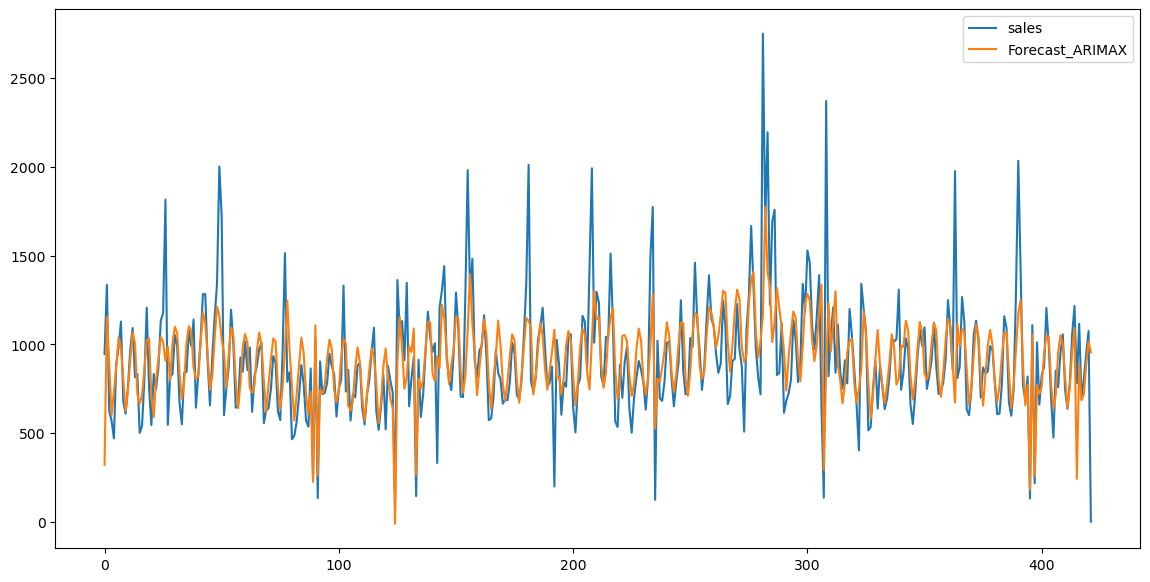

In [114]:
PO_MSD[["sales", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [115]:
PO_MSD.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday', 'Monat', 'Wochentag', 'month_name', 'Month_k', 'Holiday_1',
       'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday',
       'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'sales_forecast_Regression', 'Forecast_ARIMAX'],
      dtype='object')

In [116]:
# Replace 'sales' with the actual column name if different
data = PO_MSD['sales']

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                           order=comb,
                                           seasonal_order=combs,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6990.1852159077225
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6530.072671188558
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6116.394649991866
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5721.074227268882
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =6112.537459896646
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5892.786044032068
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5819.095479569394
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5722.879459380367
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6658.982058092127
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6315.4245146912435
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =6084.290142515167
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5692.548090507925
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6088.906474908619
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =5864.472857725505
ARIMA (0, 0, 1) x 

In [117]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset "PO_Port" has a column named "sales" representing the time series data
# Replace 'sales' with the actual column name if different
data = PO_MSD['sales']

# Define the exogenous variables (including the constant if needed)
exog_variables = PO_MSD[['Holiday_1', 'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]
exog_variables = sm.add_constant(exog_variables)  # If you need a constant term

# Create the SARIMAX model with AR order = 1, MA order = 0, and seasonal order = (0, 1, 1, 12)
order = (1, 1, 1)  # AR order = 1, MA order = 0
seasonal_order = (0, 1, 1, 12)  # Seasonal order (P, D, Q, S) = (0, 1, 1, 12)
model = sm.tsa.SARIMAX(data, exog=exog_variables, order=order, seasonal_order=seasonal_order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  422
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2896.390
Date:                            Tue, 01 Aug 2023   AIC                           5838.779
Time:                                    23:25:31   BIC                           5931.095
Sample:                                         0   HQIC                          5875.305
                                            - 422                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4732   6271.711     -0.000      1.000   -1.23e+04    1.23e+04
Holiday_1  

# Modells mit incident_hours:

In [29]:
fr=PO_MSD['incident_hours'].value_counts(dropna=False)
fr

 NaN      210
 1.0       28
 2.0       26
 3.0       19
 5.0       14
         ... 
 139.0      1
 33.0       1
 21.0       1
-1.0        1
 63.0       1
Name: incident_hours, Length: 66, dtype: int64

In [30]:
# Replace NaN values with 0
PO_MSD["incident_hours"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_MSD["incident_hours"] = PO_MSD["incident_hours"].astype(int)

# Now you can check the value counts again
frq = PO_MSD["incident_hours"].value_counts(dropna=False)
print(frq)

 0      216
 1       28
 2       26
 3       19
 5       14
       ... 
 139      1
 33       1
 21       1
-1        1
 63       1
Name: incident_hours, Length: 65, dtype: int64


In [31]:
# Anzahl die ["incident_hours"]:
incident_hours_sum = PO_MSD["incident_hours"].sum()

print(incident_hours_sum)

5535


In [32]:
# Convert the 'date' column to pandas datetime format
PO_MSD = pd.DataFrame(PO_MSD)
PO_MSD['date'] = pd.to_datetime(PO_MSD['date'], format='%Y-%m-%d')

# Set the 'date' column as the DataFrame's index
PO_MSD.set_index('date', inplace=True)

# Ensure that incident hours are limited to 24 for each day
PO_MSD['incident_hours'] = PO_MSD['incident_hours'].apply(lambda x: min(x, 24))

# Print the resulting DataFrame
PO_MSD.head(30)

,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2,1.0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14,2.0,...,0,0,0,0,0,0,0,0,0,0
2022-01-07,PO,CR_LI_HOL/Zalisz K,MSD,890.0,NaN,NaN,0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2022-01-08,PO,CR_LI_HOL/Zalisz K,MSD,984.0,2022-01-08,2022-01-08,1,Ausfall,3,1.0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10,PO,CR_LI_HOL/Zalisz K,MSD,1128.0,2022-01-10,2022-01-15,1,-,24,6.0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,PO,CR_LI_HOL/Zalisz K,MSD,677.0,2022-01-11,2022-01-15,1,Ausfall,8,2.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Anzahl die ["incident_hours"]:
incident_hours_sum = PO_MSD["incident_hours"].sum()

print(incident_hours_sum)

2141


In [34]:
PO_MSD.columns

Index(['product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday', 'Monat', 'Wochentag', 'month_name', 'Month_k', 'Holiday_1',
       'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday',
       'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

## 1- Regression mti 'incident_hours':

In [35]:
# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y)
X = PO_MSD[['Holiday_1',  'incident_hours',
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
y = PO_MSD['sales']

# Füge eine Konstante hinzu, um den Intercept zu berücksichtigen
X = sm.add_constant(X)

# Erstelle und fitte das Regressionsmodell
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     11.45
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.06e-26
Time:                        00:59:45   Log-Likelihood:                -2959.6
No. Observations:                 422   AIC:                             5957.
Df Residuals:                     403   BIC:                             6034.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                920.1643     49

In [125]:
# Make forecasts using the model
forecasts = model.predict(X)

# Add the forecasts as a new column to the original DataFrame 'PO_TSI'
PO_MSD['sales_forecast_Regression'] = forecasts
PO_MSD.head()

,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag,month_name,Month_k,Holiday_1,Incident_1,Weekdays_Monday,Weekdays_Saturday,Weekdays_Thursday,Weekdays_Tuesday,Weekdays_Wednesday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression,Forecast_ARIMAX
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,0,NaN,1,Neujahr,2022-01-01,Saturday,January,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350.135183,321.031524
2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2,1.0,0,NaN,2022-01-01,Monday,January,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1007.746038,1155.628690
2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,0,NaN,0,NaN,2022-01-01,Tuesday,January,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,785.055417,885.691497
2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1,1.0,0,NaN,2022-01-01,Wednesday,January,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,657.036034,602.047902
2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14,2.0,0,NaN,2022-01-01,Thursday,January,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,739.098355,731.397891


<Axes: xlabel='date'>

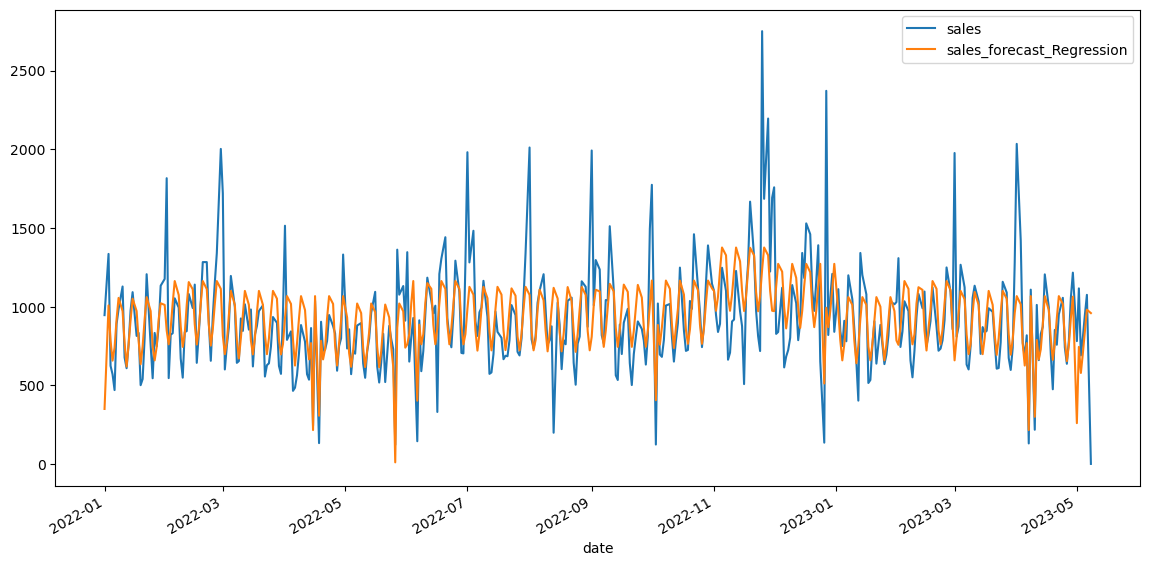

In [54]:
PO_MSD[["sales", "sales_forecast_Regression"]].plot(figsize=(14, 7))

## L ag_1 

In [55]:
import statsmodels.api as sm

# Define the exogenous variables (X) and the endogenous variable (y)
X = PO_MSD[['Holiday_1', 'incident_hours', 
           'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
           'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]  
y = PO_MSD['sales']

# Fitting the initial OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Check the initial Durbin-Watson statistic
dw_initial = sm.stats.stattools.durbin_watson(results.resid)

# Desired target for Durbin-Watson statistic (e.g., 1.5)
target_dw = 1.5

# Define the maximum lag value
max_desired_lag = 1

# Initialize the desired_lag to None
desired_lag = None

# Check if the initial Durbin-Watson statistic is below the target
while dw_initial < target_dw:
    # Increment the desired lag value from 1 up to max_desired_lag
    desired_lag = desired_lag + 1 if desired_lag is not None else 1
    
    # Add the desired lagged term to X (assuming AR structure)
    X[f'Lag_{desired_lag}'] = y.shift(desired_lag)
    X = X.dropna()  # Remove NaN rows introduced by lagging

    # Update y to match the same indices as X after lagging
    y = y[X.index]

    # Re-fit the model with the updated X
    model = sm.OLS(y, X)
    results = model.fit()

    # Check the new Durbin-Watson statistic
    dw_initial = sm.stats.stattools.durbin_watson(results.resid)

    # Break the loop if the maximum desired lag is reached
    if desired_lag >= max_desired_lag:
        break

# Display the results with the desired Durbin-Watson statistic
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     12.21
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.45e-29
Time:                        19:30:40   Log-Likelihood:                -2943.9
No. Observations:                 421   AIC:                             5928.
Df Residuals:                     401   BIC:                             6009.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                791.9582     59

## Prognose:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     12.21
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.45e-29
Time:                        19:30:42   Log-Likelihood:                -2943.9
No. Observations:                 421   AIC:                             5928.
Df Residuals:                     401   BIC:                             6009.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                791.9582     59

<Axes: xlabel='date'>

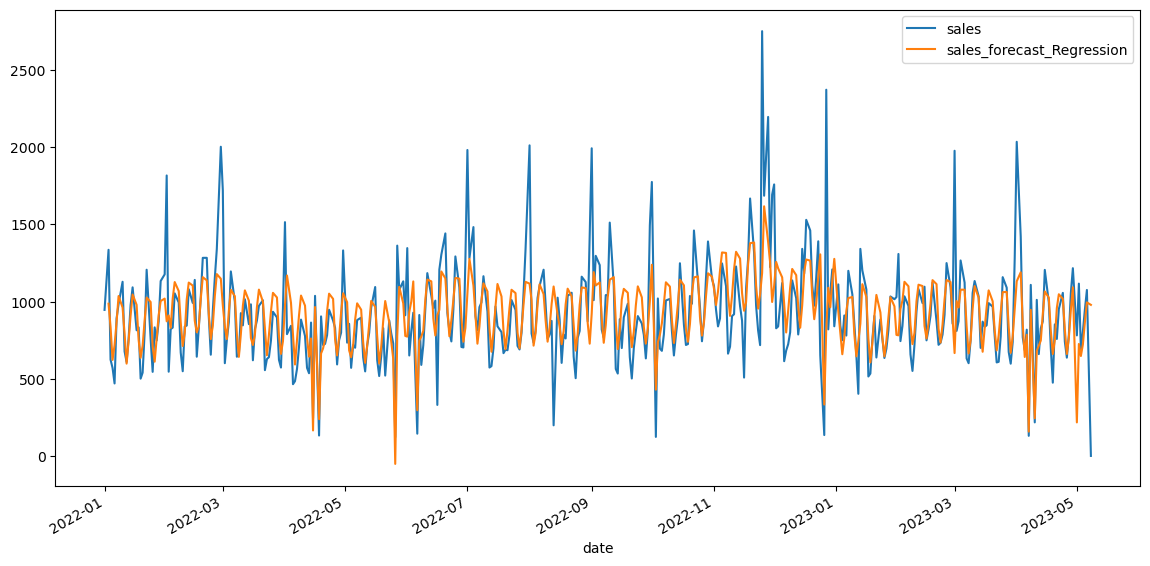

In [56]:
import statsmodels.api as sm

# ... (Assuming you have defined X and y here)

# Fitting the initial OLS model
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()
print(results.summary())

# Make forecasts using the model on the original DataFrame 'X'
forecasts = results.predict(X_with_const)

# Add the forecasts as a new column to the original DataFrame 'PO_SC'
PO_MSD['sales_forecast_Regression'] = forecasts
PO_MSD[["sales", "sales_forecast_Regression"]].plot(figsize=(14, 7))

## 2- ARIMAX:

In [57]:
exog= PO_MSD[['Holiday_1', 'incident_hours', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
endog= PO_MSD['sales']

# Create the ARIMA model with AR order = 1 and MA order = 0 and provide exogenous variables
order = (1, 0, 0)  # AR order = 1, MA order = 0
model = sm.tsa.ARIMA(endog, exog, order=order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  422
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2945.112
Date:                Tue, 01 Aug 2023   AIC                           5932.223
Time:                        19:30:47   BIC                           6017.169
Sample:                             0   HQIC                          5965.791
                                - 422                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                916.2974     73.112     12.533      0.000     773.000    1059.595
Holiday_1           -754.9960     78.236     -9.650      0.000    -908.336    -601.656
incident_hours      

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
# Define the exogenous features for forecasting
exogenous_features= PO_MSD[['Holiday_1', 'incident_hours',
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  

# Generate the forecast for the entire data period
forecast = results.predict(exog=exogenous_features)

# Add the forecasted values to the DataFrame
PO_MSD["Forecast_ARIMAX"] = forecast

# Print the DataFrame with the forecasted values
PO_MSD.head()

,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag,month_name,Month_k,Holiday_1,Incident_1,Weekdays_Monday,Weekdays_Saturday,Weekdays_Thursday,Weekdays_Tuesday,Weekdays_Wednesday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression,Forecast_ARIMAX
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,0,NaN,1,Neujahr,2022-01-01,Saturday,January,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,309.939873
2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2,1.0,0,NaN,2022-01-01,Monday,January,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,986.165328,1168.681741
2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,0,NaN,0,NaN,2022-01-01,Tuesday,January,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,835.710696,859.052721
2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1,1.0,0,NaN,2022-01-01,Wednesday,January,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,622.129569,617.766814
2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14,2.0,0,NaN,2022-01-01,Thursday,January,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,718.569085,727.012930


<Axes: xlabel='date'>

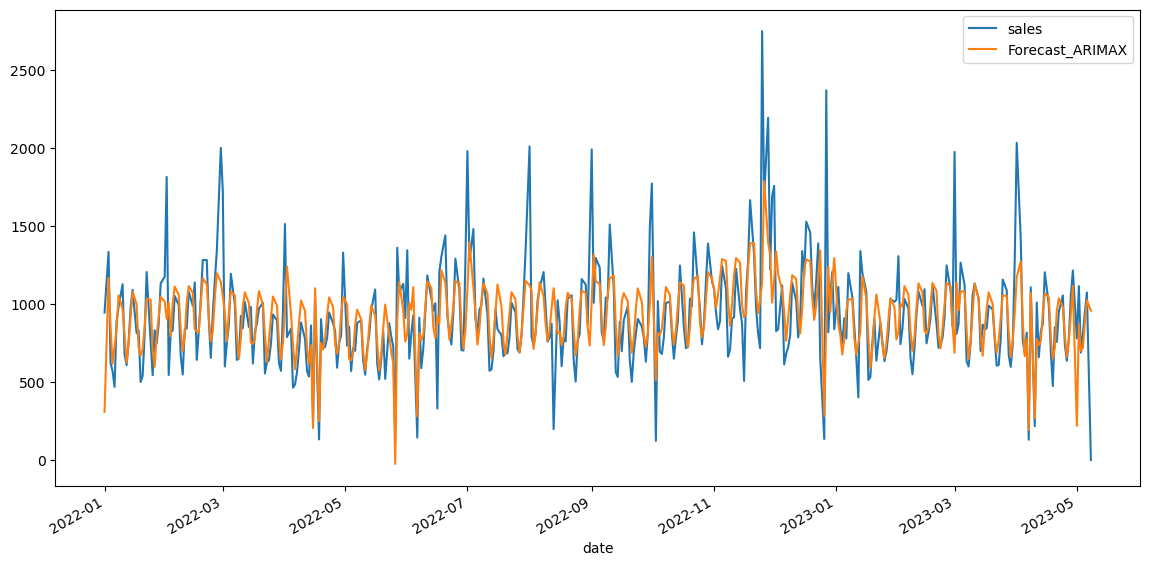

In [59]:
PO_MSD[["sales", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

## Opti_Arimax

In [36]:
data = PO_MSD['sales']

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                           order=comb,
                                           seasonal_order=combs,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6990.1852159077225
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6530.0726711885445
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6116.394649991866


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5721.074227268917
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =6112.537459896646


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5892.786044651569
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5819.095479569394


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5722.879459380413
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6658.98205809205


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6315.424514691
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =6084.290142515167


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5692.548090507834
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6088.906474908609


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =5864.472854848606


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =5812.789832717845


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =5694.320182430419
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =6223.403038309834
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =6046.259731671068
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =6269.621832562809


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =5867.848090001013
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =6059.207838847085


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =6036.470513589418
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =6006.820179863605


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =5869.667703337324
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =6045.355226945796


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =5876.859355779145
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =6095.575727802184


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =5668.110314671393
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =5901.7826668575935


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =5839.011387756618


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =5810.3565358095675


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =5669.189884602401
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6221.695101769061
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6040.2507197908635
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6094.501438460653


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5699.749505326339
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =6036.4483242513425


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5872.204667277238
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5796.759445778762


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5701.540085895658
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6069.956763148739


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =5898.84782218207
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =6071.749186637908


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5672.927462791995


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =5910.712565670046


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =5844.150763737145


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =5790.235224610693


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =5674.928331307713
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =6159.779960234181
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =5978.274679307093
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =6173.75482019101


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =5764.456026309423
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =5972.658831572857


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =5930.85246976959


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =5884.820660433948


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =5766.4320720049855
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =6026.956990513298


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =5858.309834676751


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =6070.936404179825


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =5664.256086637296


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =5868.842379191554


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =5834.495328260131


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =5790.316566341561


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =5665.968689322225
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic       5664.256087
Name: 59, dtype: object


In [40]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset "PO_Port" has a column named "sales" representing the time series data
# Replace 'sales' with the actual column name if different
data = PO_MSD['sales']

# Define the exogenous variables (including the constant if needed)
exog_variables = PO_MSD[['Holiday_1', 'incident_hours', 'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]
exog_variables = sm.add_constant(exog_variables)  # If you need a constant term

# Create the SARIMAX model with AR order = 1, MA order = 0, and seasonal order = (0, 1, 1, 12)
order = (1, 0, 0)  # AR order = 1, MA order = 0
seasonal_order = (1, 0, 0, 12)  # Seasonal order (P, D, Q, S) = (0, 1, 1, 12)
model = sm.tsa.SARIMAX(data, exog=exog_variables, order=order, seasonal_order=seasonal_order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  422
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2945.330
Date:                            Fri, 28 Jul 2023   AIC                           5934.661
Time:                                    16:10:57   BIC                           6023.651
Sample:                                         0   HQIC                          5969.827
                                            - 422                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                911.7755     72.011     12.662      0.000     770.637    1052.914
Holiday_1  

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
PO_MSD.to_csv("incident hour.csv")

<h4>Using LSTM model</h4>

In [53]:
PO_MSD =pd.read_csv('incident hour.csv')

In [58]:
PO_MSD

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2023-05-03,PO,CR_LI_HOL/Zalisz K,MSD,690.0,2023-05-03,2023-05-04,1,-,24,...,0,0,1,0,0,0,0,0,0,0
418,2023-05-04,PO,CR_LI_HOL/Zalisz K,MSD,807.0,2023-05-04,2023-05-04,1,Einschränkung,10,...,0,0,1,0,0,0,0,0,0,0
419,2023-05-05,PO,CR_LI_HOL/Zalisz K,MSD,948.0,2023-05-05,2023-05-07,1,-,24,...,0,0,1,0,0,0,0,0,0,0
420,2023-05-06,PO,CR_LI_HOL/Zalisz K,MSD,1075.0,2023-05-06,2023-05-08,1,Einschränkung,24,...,0,0,1,0,0,0,0,0,0,0


In [101]:
# select the input features and target variable
X = PO_MSD[['Holiday_1', 'incident_hours',
'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]
y = PO_MSD['sales']

# split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X.iloc[0:train_size,:], X.iloc[train_size:len(X),:]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(y)]

# scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

# reshape the data for input to the LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

X

,Holiday_1,incident_hours,Weekdays_Monday,Weekdays_Saturday,Weekdays_Thursday,Weekdays_Tuesday,Weekdays_Wednesday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0,24,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
418,0,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
419,0,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
420,0,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
# define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

# Add early stopping callback
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), callbacks=[early_stopping], verbose=2)


Epoch 1/500
11/11 - 1s - loss: 0.3062 - val_loss: 0.2506 - 1s/epoch - 91ms/step
Epoch 2/500
11/11 - 0s - loss: 0.2533 - val_loss: 0.1941 - 41ms/epoch - 4ms/step
Epoch 3/500
11/11 - 0s - loss: 0.2009 - val_loss: 0.1389 - 41ms/epoch - 4ms/step
Epoch 4/500
11/11 - 0s - loss: 0.1533 - val_loss: 0.1013 - 43ms/epoch - 4ms/step
Epoch 5/500
11/11 - 0s - loss: 0.1209 - val_loss: 0.0898 - 40ms/epoch - 4ms/step
Epoch 6/500
11/11 - 0s - loss: 0.1048 - val_loss: 0.0903 - 35ms/epoch - 3ms/step
Epoch 7/500
11/11 - 0s - loss: 0.0952 - val_loss: 0.0842 - 34ms/epoch - 3ms/step
Epoch 8/500
11/11 - 0s - loss: 0.0883 - val_loss: 0.0756 - 37ms/epoch - 3ms/step
Epoch 9/500
11/11 - 0s - loss: 0.0823 - val_loss: 0.0717 - 36ms/epoch - 3ms/step
Epoch 10/500
11/11 - 0s - loss: 0.0788 - val_loss: 0.0689 - 36ms/epoch - 3ms/step
Epoch 11/500
11/11 - 0s - loss: 0.0762 - val_loss: 0.0676 - 37ms/epoch - 3ms/step
Epoch 12/500
11/11 - 0s - loss: 0.0742 - val_loss: 0.0668 - 37ms/epoch - 3ms/step
Epoch 13/500
11/11 - 0s - 

In [103]:
# make predictions with the LSTM model
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

# invert the scaling of the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train_scaled)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test_scaled)

3/3 [==============================] - 0s 1ms/step


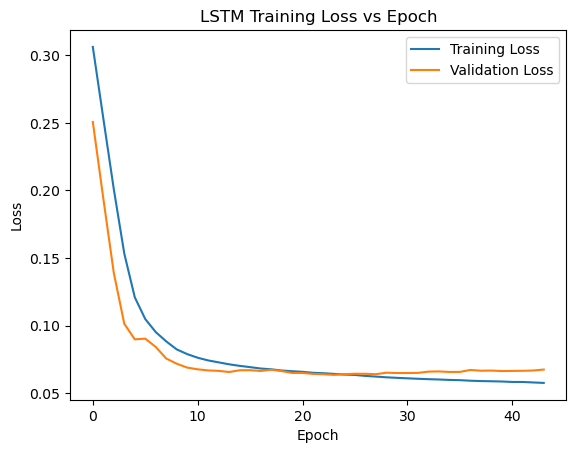

In [104]:
# plot the training and validation loss vs epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training Loss vs Epoch')
plt.legend()
plt.show()

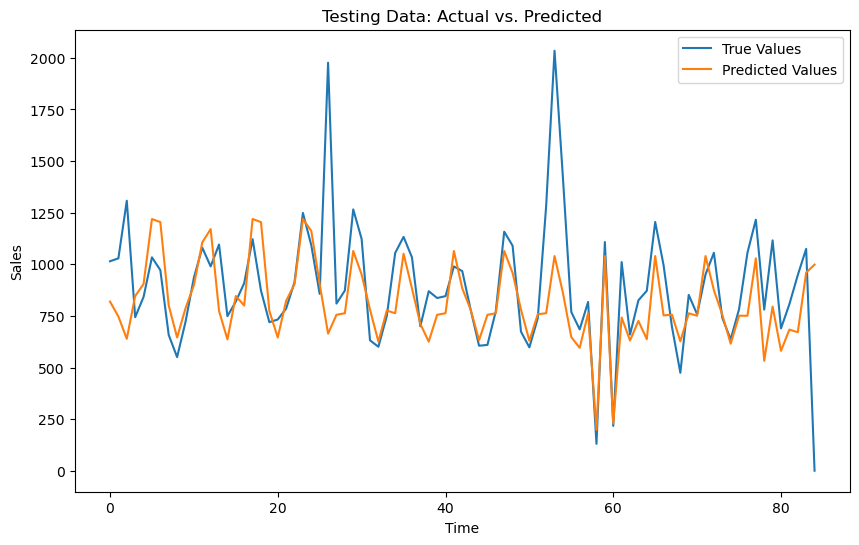

In [105]:
# plot the true values vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='True Values')
plt.plot(test_predict, label='Predicted Values')
plt.legend()
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

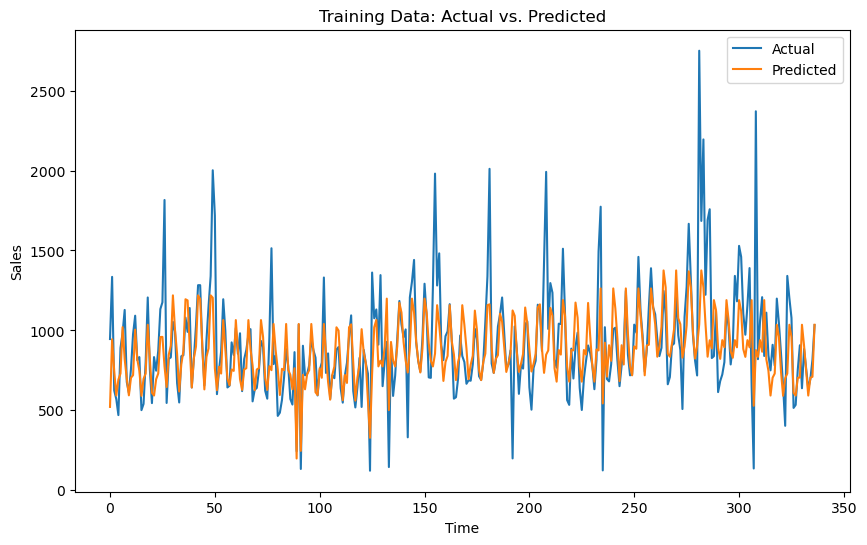

In [106]:
# plot the actual and predicted values for the training data
plt.figure(figsize=(10,6))
plt.plot(y_train_inv, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()



In [107]:
# make predictions on the testing data
test_predict = model.predict(X_test_reshaped)

# invert the scaling of the predictions and actual values
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test_scaled)

# calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test_inv, test_predict)
rmse = math.sqrt(mse)
# calculate the mean absolute error
mae = mean_absolute_error(y_test_inv, test_predict)

# print the MSE and RMSE
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
# print the MAE
print('MAE: {:.2f}'.format(mae))



3/3 [==============================] - 0s 0s/step
MSE: 75311.64
RMSE: 274.43
MAE: 166.75


<h5> Generalized linear model using different families</h5>

In [137]:
# fit the linear regression model using the GLM function with a different family
poisson_reg = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# print the model summary
print(poisson_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                  422
Model:                            GLM   Df Residuals:                      403
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17173.
Date:                Wed, 02 Aug 2023   Deviance:                       30727.
Time:                        00:22:51   Pearson chi2:                 3.39e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.8188      0

In [138]:
# make predictions for new_data
sales_pred = poisson_reg.predict(X)

# view the predicted sales values
print(sales_pred)

date
2022-01-01     309.161947
2022-01-03    1003.350618
2022-01-04     791.074969
2022-01-05     672.925244
2022-01-06     747.672977
                 ...     
2023-05-03     608.954841
2023-05-04     710.725838
2023-05-05     826.372568
2023-05-06     945.648513
2023-05-08     938.251120
Length: 422, dtype: float64


In [141]:
# Add the forecasts as a new column to the original DataFrame 'PO_TSI'
PO_MSD['sales_forecast_poisson_Regression'] = sales_pred
PO_MSD.head()


,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,incident_days,is_holiday,holiday,Monat,Wochentag,month_name,Month_k,Holiday_1,Incident_1,Weekdays_Monday,Weekdays_Saturday,Weekdays_Thursday,Weekdays_Tuesday,Weekdays_Wednesday,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression,Forecast_ARIMAX,sales_forecast_poisson_Regression
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,0,NaN,1,Neujahr,2022-01-01,Saturday,January,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350.135183,321.031524,309.161947
2022-01-03,PO,CR_LI_HOL/Zalisz K,MSD,1335.0,2022-01-03,2022-01-03,1,Einschränkung,2,1.0,0,NaN,2022-01-01,Monday,January,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1007.746038,1155.628690,1003.350618
2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,0,NaN,0,NaN,2022-01-01,Tuesday,January,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,785.055417,885.691497,791.074969
2022-01-05,PO,CR_LI_HOL/Zalisz K,MSD,570.0,2022-01-05,2022-01-05,1,Einschränkung,1,1.0,0,NaN,2022-01-01,Wednesday,January,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,657.036034,602.047902,672.925244
2022-01-06,PO,CR_LI_HOL/Zalisz K,MSD,470.0,2022-01-06,2022-01-06,1,Ausfall,14,2.0,0,NaN,2022-01-01,Thursday,January,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,739.098355,731.397891,747.672977


<Axes: xlabel='date'>

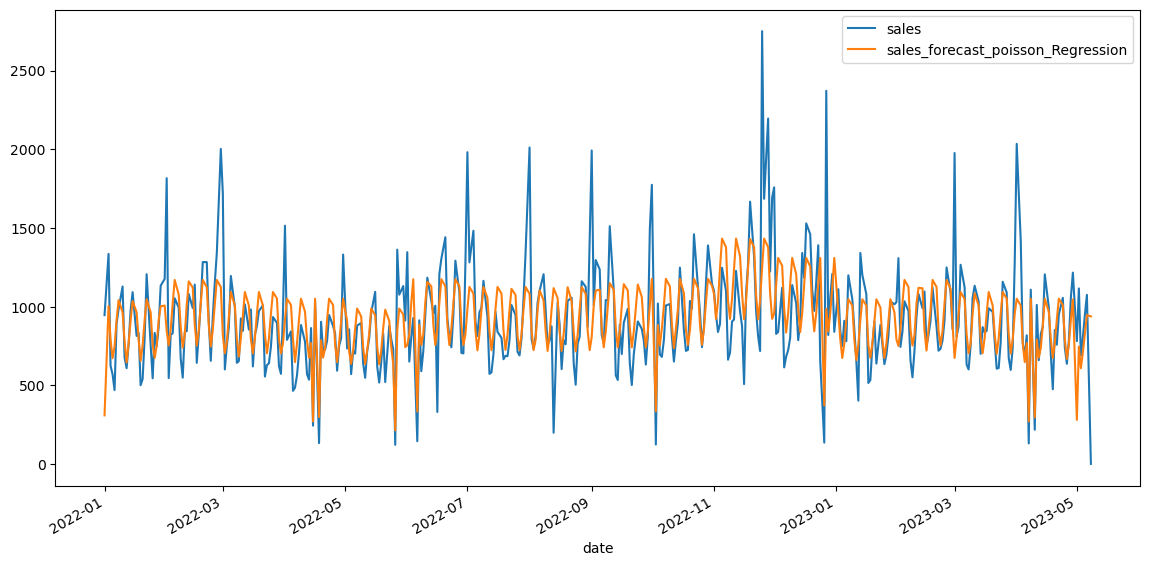

In [143]:
PO_MSD[["sales", "sales_forecast_poisson_Regression"]].plot(figsize=(14, 7))# create a scatter plot of the predicted sales values


In [146]:
# predict the target variable using the trained model
y_pred = model.predict(X)

# calculate the mean squared error and mean absolute error
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('MSE: {:.2f}'.format(mse))
print('MAE: {:.2f}'.format(mae))

MSE: 71843.29
MAE: 172.61


In [147]:
# fit the GLM model using the Exponential family
model = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.log())).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                  422
Model:                            GLM   Df Residuals:                      403
Model Family:                Gaussian   Df Model:                           18
Link Function:                    log   Scale:                          75069.
Method:                          IRLS   Log-Likelihood:                -2958.0
Date:                Wed, 02 Aug 2023   Deviance:                   3.0253e+07
Time:                        00:42:17   Pearson chi2:                 3.03e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.8251      0

<h4> Using the Incident 1 variable</h4>

In [78]:
# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y)
X = PO_MSD[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]].astype(int)  
y = PO_MSD['sales']


In [79]:
# fit the linear regression model using the GLM function with a different family
poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# print the model summary
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                  422
Model:                            GLM   Df Residuals:                      404
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4840e+05
Date:                Fri, 11 Aug 2023   Deviance:                   4.9318e+05
Time:                        21:05:47   Pearson chi2:                 1.30e+07
No. Iterations:                     7   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Holiday_1             -0.9298      0

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1767: RuntimeWarning: overflow encountered in exp
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [80]:
gaussian = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.log())).fit()
print(gaussian.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                  422
Model:                            GLM   Df Residuals:                      404
Model Family:                Gaussian   Df Model:                           17
Link Function:                    log   Scale:                      1.6930e+05
Method:                          IRLS   Log-Likelihood:                -3130.1
Date:                Fri, 11 Aug 2023   Deviance:                   6.8398e+07
Time:                        21:05:49   Pearson chi2:                 6.84e+07
No. Iterations:                    10   Pseudo R-squ. (CS):            -0.3659
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Holiday_1             -1.5495      0

In [31]:
# split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X.iloc[0:train_size,:], X.iloc[train_size:len(X),:]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(y)]

# scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

# reshape the data for input to the LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))



In [32]:
# define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

# Add early stopping callback
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), callbacks=[early_stopping], verbose=2)


Epoch 1/500
11/11 - 1s - loss: 0.2839 - val_loss: 0.2356 - 1s/epoch - 105ms/step
Epoch 2/500
11/11 - 0s - loss: 0.2235 - val_loss: 0.1750 - 37ms/epoch - 3ms/step
Epoch 3/500
11/11 - 0s - loss: 0.1687 - val_loss: 0.1251 - 34ms/epoch - 3ms/step
Epoch 4/500
11/11 - 0s - loss: 0.1311 - val_loss: 0.1053 - 35ms/epoch - 3ms/step
Epoch 5/500
11/11 - 0s - loss: 0.1127 - val_loss: 0.0980 - 37ms/epoch - 3ms/step
Epoch 6/500
11/11 - 0s - loss: 0.1036 - val_loss: 0.0881 - 39ms/epoch - 4ms/step
Epoch 7/500
11/11 - 0s - loss: 0.0953 - val_loss: 0.0789 - 36ms/epoch - 3ms/step
Epoch 8/500
11/11 - 0s - loss: 0.0884 - val_loss: 0.0725 - 36ms/epoch - 3ms/step
Epoch 9/500
11/11 - 0s - loss: 0.0831 - val_loss: 0.0684 - 37ms/epoch - 3ms/step
Epoch 10/500
11/11 - 0s - loss: 0.0794 - val_loss: 0.0663 - 43ms/epoch - 4ms/step
Epoch 11/500
11/11 - 0s - loss: 0.0765 - val_loss: 0.0659 - 34ms/epoch - 3ms/step
Epoch 12/500
11/11 - 0s - loss: 0.0743 - val_loss: 0.0655 - 41ms/epoch - 4ms/step
Epoch 13/500
11/11 - 0s -

In [33]:
# make predictions with the LSTM model
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

# invert the scaling of the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train_scaled)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test_scaled)

3/3 [==============================] - 0s 1ms/step


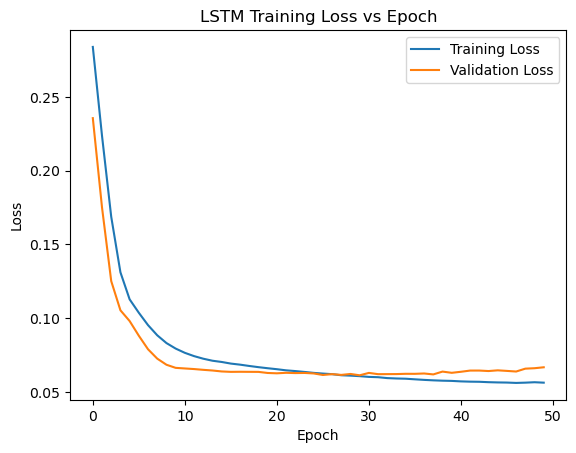

In [34]:
# plot the training and validation loss vs epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training Loss vs Epoch')
plt.legend()
plt.show()

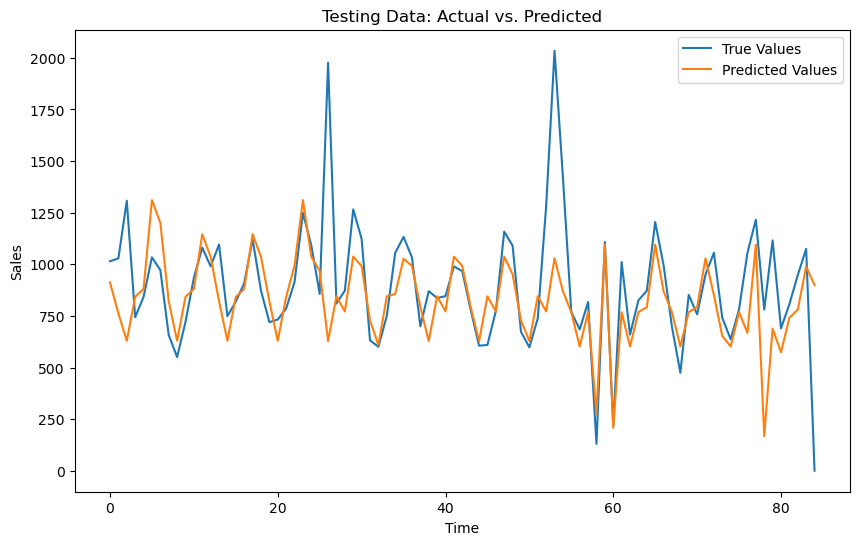

In [35]:
# plot the true values vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='True Values')
plt.plot(test_predict, label='Predicted Values')
plt.legend()
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [36]:


# Prepare input data for prediction
incident_0_data = X[X['Incident_1'] == 0].astype(int)
incident_1_data = X[X['Incident_1'] == 1].astype(int)

# Initialize a MinMaxScaler for each feature
scalers = [MinMaxScaler(feature_range=(0, 1)) for _ in range(incident_0_data.shape[1])]

# Scale the data for incident = 0
incident_0_scaled = np.column_stack([scaler.fit_transform(incident_0_data.iloc[:, i].values.reshape(-1, 1)) for i, scaler in enumerate(scalers)])

# Scale the data for incident = 1
incident_1_scaled = np.column_stack([scaler.transform(incident_1_data.iloc[:, i].values.reshape(-1, 1)) for i, scaler in enumerate(scalers)])

incident_0_reshaped = incident_0_scaled.reshape((incident_0_scaled.shape[0], 1, incident_0_scaled.shape[1]))

# Match the number of instances in incident 0 and incident 1 data
incident_1_reshaped = incident_1_scaled[:incident_0_reshaped.shape[0]].reshape((incident_0_reshaped.shape[0], 1, incident_0_reshaped.shape[2]))

# Make predictions
incident_0_predictions = model.predict(incident_0_reshaped)
incident_1_predictions = model.predict(incident_1_reshaped)

# Inverse transform the predictions
incident_0_predictions = scaler.inverse_transform(incident_0_predictions)
incident_1_predictions = scaler.inverse_transform(incident_1_predictions)

# Calculate the difference
difference = incident_1_predictions - incident_0_predictions

5/5 [==============================] - 0s 868us/step


In [44]:
# Calculate the percentage loss in sales due to incident
percentage_loss = (difference / incident_1_predictions) * 100

# Calculate the average absolute loss in sales due to incident
average_absolute_loss = np.mean(np.abs(difference))

# Calculate the general average percentage loss in sales due to incident
general_average_percentage_loss = np.mean(percentage_loss)

print(f"Percentage Loss in Sales due to Incident: {percentage_loss}%")
print(f"General Average Percentage Loss in Sales due to Incident: {general_average_percentage_loss}%")
print(f"Average Absolute Loss in Sales due to Incident: {average_absolute_loss}")

Percentage Loss in Sales due to Incident: [[  23.806412  ]
 [ -25.493176  ]
 [   3.1998622 ]
 [   4.997313  ]
 [ -43.70006   ]
 [ -27.137989  ]
 [-126.57127   ]
 [ -55.393135  ]
 [  20.9895    ]
 [  -1.7357221 ]
 [  -4.3736076 ]
 [ -35.09127   ]
 [ -47.09873   ]
 [  15.469235  ]
 [ -33.513283  ]
 [  80.26715   ]
 [ -12.838848  ]
 [  86.97879   ]
 [  -1.4402162 ]
 [ -31.240839  ]
 [   6.35266   ]
 [  32.444992  ]
 [  17.547863  ]
 [  27.678663  ]
 [  79.10622   ]
 [ -20.301004  ]
 [  -8.076791  ]
 [  29.169554  ]
 [  -4.73428   ]
 [   1.1387491 ]
 [ -22.501717  ]
 [ -52.808643  ]
 [ -23.256437  ]
 [  18.615595  ]
 [  21.671837  ]
 [ -22.501703  ]
 [ -52.808617  ]
 [ -23.256437  ]
 [  21.671837  ]
 [ -88.16138   ]
 [ -22.420715  ]
 [  10.928225  ]
 [  -1.4862555 ]
 [ -40.21589   ]
 [   5.829225  ]
 [ -19.516521  ]
 [ -29.902231  ]
 [ -24.812832  ]
 [  15.21354   ]
 [   5.829225  ]
 [  18.084074  ]
 [ -19.516521  ]
 [ -42.503555  ]
 [ -35.320812  ]
 [  12.267573  ]
 [   7.8385406 ]
 [  23

In [49]:
# Prepare input data for prediction
incident_0_data = X[X['Incident_1'] == 0].astype(int)
incident_1_data = X[X['Incident_1'] == 1].astype(int)

# Make predictions for incident = 0
incident_0_predictions_gaussian = gaussian.predict(incident_0_data)
incident_0_predictions_poisson = poisson.predict(incident_0_data)

# Make predictions for incident = 1
incident_1_predictions_gaussian = gaussian.predict(incident_1_data)
incident_1_predictions_poisson = poisson.predict(incident_1_data)

In [53]:
# Reset indices for both prediction sets gaussian
incident_0_predictions_gaussian_reset = incident_0_predictions_gaussian.reset_index(drop=True)
incident_1_predictions_gaussian_reset = incident_1_predictions_gaussian.reset_index(drop=True)

# Align the predictions based on indices
incident_1_predictions_aligned = incident_1_predictions_gaussian_reset.loc[incident_0_predictions_gaussian_reset.index]

# Calculate the difference between incident 1 and incident 0 predictions
difference_gaussian = incident_1_predictions_aligned - incident_0_predictions_gaussian_reset
difference_gaussian = difference_gaussian.replace(np.nan, 0)  # Replace any remaining NaN values with 0


In [54]:
# Reset indices for both prediction sets poisson
incident_0_predictions_poisson_reset = incident_0_predictions_poisson.reset_index(drop=True)
incident_1_predictions_poisson_reset = incident_1_predictions_poisson.reset_index(drop=True)

# Align the predictions based on indices
incident_1_predictions_aligned_poisson = incident_1_predictions_poisson_reset.loc[incident_0_predictions_poisson_reset.index]

# Calculate the difference between incident 1 and incident 0 predictions
difference_poisson = incident_1_predictions_aligned_poisson - incident_0_predictions_poisson_reset
difference_poisson = difference_poisson.replace(np.nan, 0)  # Replace any remaining NaN values with 0

In [55]:
# Calculate the percentage loss in sales due to incident gaussian
percentage_loss_gaussian = (difference_gaussian / incident_1_predictions_gaussian_reset) * 100

# Calculate the average absolute loss in sales due to incident
average_absolute_loss_gaussian = np.mean(np.abs(difference_gaussian))

# Calculate the general average percentage loss in sales due to incident
general_average_percentage_loss_gaussian = np.mean(percentage_loss_gaussian)

print(f"Percentage Loss in Sales due to Incident: {percentage_loss_gaussian}%")
print(f"General Average Percentage Loss in Sales due to Incident: {general_average_percentage_loss_gaussian}%")
print(f"Average Absolute Loss in Sales due to Incident: {average_absolute_loss_gaussian}")

Percentage Loss in Sales due to Incident: 0      68.814616
1     -25.519125
2     -29.093772
3       7.014187
4     -23.240591
         ...    
281          NaN
282          NaN
283          NaN
284          NaN
285          NaN
Length: 286, dtype: float64%
General Average Percentage Loss in Sales due to Incident: -19.08755324514294%
Average Absolute Loss in Sales due to Incident: 249.55033513667266


In [56]:
# Calculate the percentage loss in sales due to incident poisson
percentage_loss_poisson = (difference_poisson / incident_1_predictions_poisson_reset) * 100

# Calculate the average absolute loss in sales due to incident
average_absolute_loss_poisson = np.mean(np.abs(difference_poisson))

# Calculate the general average percentage loss in sales due to incident
general_average_percentage_loss_poisson = np.mean(percentage_loss_poisson)

print(f"Percentage Loss in Sales due to Incident: {percentage_loss_poisson}%")
print(f"General Average Percentage Loss in Sales due to Incident: {general_average_percentage_loss_poisson}%")
print(f"Average Absolute Loss in Sales due to Incident: {average_absolute_loss_poisson}")

Percentage Loss in Sales due to Incident: 0      67.601485
1     -25.394982
2     -27.904107
3       8.653548
4     -24.042533
         ...    
281          NaN
282          NaN
283          NaN
284          NaN
285          NaN
Length: 286, dtype: float64%
General Average Percentage Loss in Sales due to Incident: -18.671156135300716%
Average Absolute Loss in Sales due to Incident: 248.92784770107494
